In [3]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import pickle
import yaml
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


# Lectura df procesado

In [4]:
df_processed = pd.read_csv('../data/processed/processed.csv')

# Division Train y test a csv

In [15]:

train_df, test_df = train_test_split(df_processed, test_size=0.2, random_state=42)

In [16]:

def guardar_en_csv(df, ruta_destino):
   
    df.to_csv(ruta_destino, index=False)
    print(f"DataFrame guardado en {ruta_destino}")

In [17]:
guardar_en_csv(train_df,'../data/train/train_df.csv')

DataFrame guardado en ../data/train/train_df.csv


In [18]:
guardar_en_csv(test_df,'../data/test/test_df.csv')


DataFrame guardado en ../data/test/test_df.csv


## Entrenamiento de Modelos

In [5]:
X = df_processed.drop('DELAYED', axis=1).copy()

y = df_processed['DELAYED'].copy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
df_processed['DELAYED'].value_counts()

DELAYED
0    37433
1    20758
Name: count, dtype: int64

1. Logistic Regression (Regresión Logística)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

accuracy = lr.score(X_test_scaled, y_test)
print("Accuracy:", accuracy *100)

y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=["NOT DELAYED", "DELAYED"])

print(cm)
print(clr)

Accuracy: 99.27828851275883
[[7418  112]
 [1879 2230]]
              precision    recall  f1-score   support

 NOT DELAYED       0.80      0.99      0.88      7530
     DELAYED       0.95      0.54      0.69      4109

    accuracy                           0.83     11639
   macro avg       0.88      0.76      0.79     11639
weighted avg       0.85      0.83      0.81     11639



c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


- Mejora de LogisticRegression

In [8]:
from sklearn.pipeline import Pipeline

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('lr', LogisticRegression(max_iter=1000))  
])

# Hiperparámetros 
parameters = {
    'lr__C': [0.1, 1, 0.01], 
    'lr__penalty': ['l2']  
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='recall', verbose=2)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_


In [11]:
print('Metricas Logistic Regression')

# Predecir best model
y_pred = best_model.predict(X_test)


# Calcula métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)


print("accuracy: {:.2f}%".format(accuracy * 100))
print("precision: {:.2f}%".format(precision * 100))
print("recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))

print("Matriz de confusión:")
print(confusion)

Metricas Logistic Regression
accuracy: 99.28%
precision: 99.31%
recall: 98.64%
F1 score: 98.97%
Matriz de confusión:
[[7502   28]
 [  56 4053]]


2. Naive Bayes


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalador
    ('nb', GaussianNB())  # Clasificador Naive Bayes
])

# Definir los hiperparámetros a ajustar
parameters = {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7]  
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

best_model


Pipeline(steps=[('scaler', StandardScaler()),
                ('nb', GaussianNB(var_smoothing=1e-07))])

In [ ]:
print('Metricas Naive Bias')
# Predecir con el mejor modelo en los datos de prueba
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precisión: {:.2f}%".format(precision * 100))
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("recall: {:.2f}%".format(recall * 100))
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("f1_score : {:.2f}%".format(f1 * 100))




Metricas Naive Bias
accuracy: 38.73%
Precisión: 36.25%
recall: 96.91%
f1_score : 52.76%


3. Random Forest 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalador
    ('rf', RandomForestClassifier())  # Clasificador Random Forest
])

# Definir los hiperparámetros a ajustar
parameters = {
    'rf__n_estimators': [60, 70, 90],
    'rf__max_depth': [ 3],
    'rf__criterion:':['gini', 'log_loss']
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy' , verbose=3)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

print('Metricas Random Forest')

# Predecir con el mejor modelo en los datos de prueba
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

precision = precision_score(y_test, y_pred)
print("Precisión: {:.2f}%".format(precision * 100))

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))

f1 = f1_score(y_test, y_pred)
print("F1-score: {:.2f}%".format(f1 * 100))
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(confusion)

Metricas Random Forest
Accuracy: 100.00%
Precisión: 100.00%
Recall: 100.00%
F1-score: 100.00%


Metricas Random Forest
Accuracy: 100.00%
Precisión: 100.00%
Recall: 100.00%
F1-score: 100.00%

4. Gradient Boosting 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalador
    ('gb', GradientBoostingClassifier())  # Clasificador Gradient Boosting
])

# Definir los hiperparámetros a ajustar
parameters = {
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.1, 0.05, 0.01],
    'gb__max_depth': [3, 1, 2]
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

print('Métricas Gradient Boosting')

# Predecir con el mejor modelo en los datos de prueba
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

precision = precision_score(y_test, y_pred)
print("Precisión: {:.2f}%".format(precision * 100))

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))

f1 = f1_score(y_test, y_pred)
print("F1-score: {:.2f}%".format(f1 * 100))


Métricas Gradient Boosting
Accuracy: 100.00%
Precisión: 100.00%
Recall: 100.00%
F1-score: 100.00%


Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4] END rf__criterion=gini, rf__max_depth=3, rf__n_estimators=60;, score=0.682 total time=   3.8s
[CV 2/4] END rf__criterion=gini, rf__max_depth=3, rf__n_estimators=60;, score=0.787 total time=   3.3s
[CV 3/4] END rf__criterion=gini, rf__max_depth=3, rf__n_estimators=60;, score=0.796 total time=   3.4s
[CV 4/4] END rf__criterion=gini, rf__max_depth=3, rf__n_estimators=60;, score=0.729 total time=   3.3s
[CV 1/4] END rf__criterion=gini, rf__max_depth=3, rf__n_estimators=70;, score=0.738 total time=   3.2s
[CV 2/4] END rf__criterion=gini, rf__max_depth=3, rf__n_estimators=70;, score=0.694 total time=   3.4s
[CV 3/4] END rf__criterion=gini, rf__max_depth=3, rf__n_estimators=70;, score=0.663 total time=   3.3s
[CV 4/4] END rf__criterion=gini, rf__max_depth=3, rf__n_estimators=70;, score=0.788 total time=   3.2s
[CV 1/4] END rf__criterion=gini, rf__max_depth=3, rf__n_estimators=90;, score=0.751 total time=   3.6s
[CV 2/4] END 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.727, test=0.705) total time=   1.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] END ..................., score=(train=0.706, test=0.696) total time=   1.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV] END ..................., score=(train=0.768, test=0.761) total time=   2.3s
[CV] END ..................., score=(train=0.645, test=0.644) total time=   2.9s
[CV] END ..................., score=(train=0.792, test=0.791) total time=   3.6s
[CV] END ..................., score=(train=0.667, test=0.657) total time=   0.8s
[CV] END ..................., score=(train=0.764, test=0.764) total time=   1.5s
[CV] END ..................., score=(train=0.806, test=0.805) total time=   2.4s
[CV] END ..................., score=(train=0.812, test=0.813) total time=   3.0s
[CV] END ..................., score=(train=0.721, test=0.723) total time=   4.1s
[CV] END ..................., score=(train=0.675, test=0.662) total time=   0.8s
[CV] END ..................., score=(train=0.665, test=0.661) total time=   1.5s
[CV] END ..................., score=(train=0.757, test=0.758) total time=   2.6s
[CV] END ..................., score=(train=0.817, test=0.822) total time=   3.1s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min finished


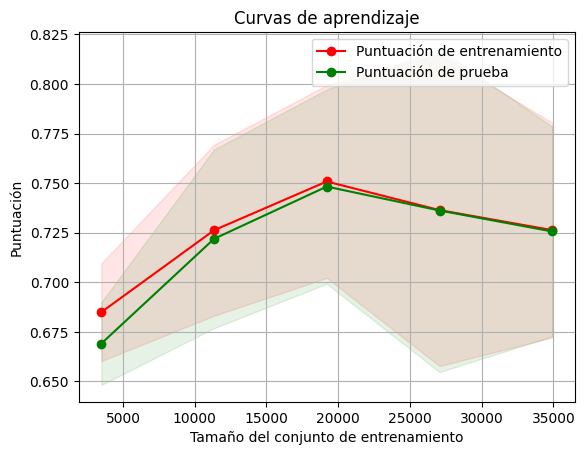

In [13]:
# Importar las librerías necesarias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalador
    ('rf', RandomForestClassifier())  # Clasificador Gradient Boosting
])


# Definir los hiperparámetros a ajustar
parameters = {
    'rf__n_estimators': [60, 70, 90],
    'rf__max_depth': [ 3],
    'rf__criterion':['gini', 'log_loss']
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=4, scoring='accuracy' , verbose=3)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Obtener las métricas del mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print(f"Métricas del mejor modelo:")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precisión: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-score: {f1:.2%}")

# Obtener las curvas de aprendizaje del mejor modelo
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=4,  verbose=3)

# Calcular las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Graficar las curvas de aprendizaje
plt.figure()
plt.title("Curvas de aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Puntuación")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Puntuación de entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Puntuación de prueba")
plt.legend(loc="best")
plt.show()

In [12]:
# Guardar el modelo entrenado en un archivo pickle
with open('../models/trained_model.pkl', 'wb') as archivo_salida:
    pickle.dump(best_model, archivo_salida)

# Guardar la configuración del modelo en un archivo YAML
model_config = {
    'model_name': 'Naive Bayes',
    'best_params': best_model.get_params()
}

with open('../models/model_config.yaml', 'w') as f:
    yaml.dump(model_config, f)